<a href="https://colab.research.google.com/github/panimesh14/user-relevance-scoring-model-improved/blob/main/Jan_11_2023_user_persona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
users = pd.read_csv('user_details_college_company - sample-data-sheet_08_01.csv')
pd.set_option('display.max_columns',None)
users.head(2)

,linkedin_url,user_id,username,booking_count,gross_earning,core_earning,profile_views,first_booking,last_booking,active_days,date_joined,age_in_days,topmate_title,topmate_description,currency,followers,company_name,company_tier_numerical,college_name,college_tier_numerical,years_of_experience,posts_per_week,avg_engagement_per_post_last_30_days,num_post_last_30_days,num_comments_last_30_days,num_reactions_last_30_days,gender_score,num_promotional_posts_last_30_day,designation,link_in_bio,post_in_featured,num_of_featured_post,avg_likes_per_post_by_following,avg_comments_per_post_by_following,documents_flag,num_of_documents,articles_flag,num_of_articles,summary_keywords,email_present,instagram_flag,twitter_flag,youtube_flag,num_of_jobs,jobs_count_by_experience,average_company_tenure,num_of_certification,num_of_research_paper,highest_degree_of_education,max_number_of_endorsement,average_endorsement,num_of_recommendation_given,num_of_recommendation_received,industry_software,industry_data,industry_marketing,industry_hr,industry_design,industry_finance,industry_product,industry_management,industry_operations,industry_other,current_position_title,avg_likes_per_post_last_30_days,avg_comments_per_post_last_30_days,gross_bookings_count,one_on_one_bookings_count,profile_picture_present,cover_picture_present,num_of_connections,talks_about,services_provided,creator_mode,age_on_linkedin,college_names_array,degrees_array,company_names_array
0,https://www.linkedin.com/in/gakash2107/,2161,gakash2107,1.0,3850.0,3850.0,45.0,NaN,NaN,42.0,"Mon, 10-Jan-2022",360.0,Helping the community so that we can grow toge...,Akash is a Technical Cloud Enthusiast having a...,INR,2384.0,Citrix,8.0,Galgotias University,NaN,7.0,0.000000,0.0,0.0,0.0,0.0,NaN,0.0,Senior Customer Success Engineer - UKI Channel...,NaN,NaN,NaN,0.000000,0.0,False,0.0,False,0.0,NaN,False,False,False,False,6.0,0.857143,0.857143,NaN,NaN,"Bachelor of Technology (B.Tech.), Computer Sci...",0.0,0.0,NaN,NaN,True,True,True,False,True,True,False,False,False,False,Senior Customer Success Engineer - UKI Channel...,0.0,0.0,1.0,77.0,True,True,2334.0,NaN,NaN,True,NaN,"Galgotias University,INSEAD,Boston Consulting ...","Bachelor of Technology (B.Tech.), Computer Sci...","Citrix,Citrix,Microsoft,Akamai Technologies,Wi..."
1,https://www.linkedin.com/in/ananya-vats-7642b2...,3402,ananya_vats,36.0,0.0,0.0,253.0,NaN,NaN,6.0,"Wed, 23-Feb-2022",316.0,NaN,"Hi, I am a product manager at Swiggy working i...",INR,11976.0,Google,10.0,Faculty of Management Studies - University of ...,NaN,4.0,0.304348,11.0,1.0,0.0,0.0,NaN,0.0,Product Manager,NaN,NaN,NaN,0.000919,0.0,False,0.0,False,0.0,NaN,False,False,False,False,5.0,1.250000,1.250000,NaN,NaN,Master of Business Administration - MBA,0.0,0.0,NaN,NaN,False,False,True,False,False,True,True,False,False,False,Product Manager,11.0,0.0,36.0,36.0,True,False,8456.0,NaN,NaN,True,NaN,Faculty of Management Studies - University of ...,"Master of Business Administration - MBA,Bachel...","Google,Swiggy,Toastmasters International,Micro..."


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2491 entries, 0 to 2490
Data columns (total 78 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   linkedin_url                          1945 non-null   object 
 1   user_id                               2491 non-null   int64  
 2   username                              1769 non-null   object 
 3   booking_count                         1769 non-null   float64
 4   gross_earning                         1769 non-null   float64
 5   core_earning                          1674 non-null   float64
 6   profile_views                         1769 non-null   float64
 7   first_booking                         0 non-null      float64
 8   last_booking                          0 non-null      float64
 9   active_days                           1769 non-null   float64
 10  date_joined                           1769 non-null   object 
 11  age_in_days      

In [ ]:
users.columns

Index(['linkedin_url', 'user_id', 'username', 'booking_count', 'gross_earning',
       'core_earning', 'profile_views', 'first_booking', 'last_booking',
       'active_days', 'date_joined', 'age_in_days', 'topmate_title',
       'topmate_description', 'currency', 'followers', 'company_name',
       'company_tier_numerical', 'college_name', 'college_tier_numerical',
       'years_of_experience', 'posts_per_week',
       'avg_engagement_per_post_last_30_days', 'num_post_last_30_days',
       'num_comments_last_30_days', 'num_reactions_last_30_days',
       'gender_score', 'num_promotional_posts_last_30_day', 'designation',
       'link_in_bio', 'post_in_featured', 'num_of_featured_post',
       'avg_likes_per_post_by_following', 'avg_comments_per_post_by_following',
       'documents_flag', 'num_of_documents', 'articles_flag',
       'num_of_articles', 'summary_keywords', 'email_present',
       'instagram_flag', 'twitter_flag', 'youtube_flag', 'num_of_jobs',
       'jobs_count_by_experi

In [ ]:
#list of relevant columns
rel_cols=['booking_count', 'gross_earning', 'core_earning', 'profile_views', 'active_days', 'date_joined', 'age_in_days', 'currency', 
       'followers', 'company_tier_numerical', 'college_tier_numerical', 'years_of_experience', 'posts_per_week','avg_engagement_per_post_last_30_days', 'num_post_last_30_days',
       'num_comments_last_30_days', 'num_reactions_last_30_days',
       'gender_score', 'num_promotional_posts_last_30_day', 'designation', 'num_of_featured_post','avg_likes_per_post_by_following', 'avg_comments_per_post_by_following', 'num_of_documents', 'num_of_articles', 'email_present',
       'instagram_flag', 'twitter_flag', 'youtube_flag', 'num_of_jobs',
       'jobs_count_by_experience', 'average_company_tenure',
       'num_of_certification', 'num_of_research_paper',
       'highest_degree_of_education', 'max_number_of_endorsement',
       'average_endorsement', 'num_of_recommendation_given',
       'num_of_recommendation_received', 'industry_software', 'industry_data',
       'industry_marketing', 'industry_hr', 'industry_design',
       'industry_finance', 'industry_product', 'industry_management',
       'industry_operations', 'industry_other', 'current_position_title',
       'avg_likes_per_post_last_30_days', 'avg_comments_per_post_last_30_days',
       'gross_bookings_count', 'one_on_one_bookings_count',
       'profile_picture_present', 'cover_picture_present',
       'num_of_connections', 'talks_about', 'services_provided',
       'creator_mode', 'age_on_linkedin', 'college_names_array',
       'degrees_array', 'company_names_array'];

In [ ]:
set(users['designation'])

{'AGM - Product',
 'AI / ML Engineer',
 'AI/ML Engineer II',
 'ASIC Engineer',
 'AVP',
 'AVP - E Commerce Head',
 'AVP - Product',
 'AVP - Product Management',
 'AVP - Strategy, Investor Relations & Corporate Development',
 'AVP Corporate Relations & Adjunct Professor Skill Development',
 'AWS Finland Lead architect, AWS MAP Ambassador',
 'Academic Counselor',
 'Academic/ Research Associate',
 'Account Executive',
 'Account Manager',
 'Account Strategist',
 'Accountant',
 'Actuarial Analyst',
 'Advisor finance',
 'Advisor/Partner',
 'Analyst',
 'Analyst (Investment Banking)',
 'Analyst -  Data Science',
 'Analyst / Software Engineer',
 'Analyst, Data Management & Quantitative Analysis',
 'Analytical Solutions Analyst',
 'Analytics Advisory Specialist',
 'Analytics Analyst',
 'Analytics Consultant',
 'Analytics Lead',
 'Analytics Manager',
 'Android Developer',
 'Angel Investor',
 'App Dev Programmer Analyst - Data Engineering',
 'App development Mentor',
 'Application Development Manag

In [ ]:
#Unique Company names
comp_dict = set(users['company_names_array'].dropna());
for ind in comp_dict:
    for c in ind.split(','):
        print(c)
#for u in users['company_names_array']:
#    comp = u.split(',');
#    print(comp[0]);

Girlscript Howrah
Google Crowdsource 
CodeIN Community 
GirlScript Summer of Code
GeeksforGeeks
Xip
DecoverHQ
Spotnana
ThoughtSpot
Princeton University
Princeton University
NowFloats
MoEVing
Genpact
CERN
Indian Institute of Science Education and Research (IISER)
 Pune
RevGenius
Flexiple
Seekho
Volvo Car India
Maruti Suzuki India Limited
Maruti Suzuki India Limited
Bluecore
MobiKwik
ConnectWise
Army Institute of Technology (AIT)
 Pune
Global Prosumers
Global Prosumers
NVIDIA
Samsung Electronics
Samsung Electronics
Samsung Electronics
Wipro
Groww
 India
Indian Institute of Technology
 Delhi
Indian Institute of Management Udaipur
Programming Pathshala
Avtaar
Intuit
OneDirect
OneDirect
Coforge
Salesforce
Cloud Paradigm
 Inc.
Tata Consultancy Services
Tata Consultancy Services
Indus Insights
Self-employed
Cerebro Team - The Financial Literacy Academy
Avail Finance
Alphabot India
HONEYPOTZ
 INC. 
TWIXSOFT
None
JPMorgan Chase & Co.
Morgan Stanley
NTT DATA Services
Infosys
Grasim Industries Li

In [ ]:
pcat = ['college_names_array', 'degrees_array', 'company_names_array']

In [ ]:
#list of relevant columns
personal_cols=[
       'gender_score'       
      ];

In [ ]:
professional_cols=['company_tier_numerical', 'college_tier_numerical', 'years_of_experience', 'designation','highest_degree_of_education', 'industry_software', 'industry_data',
       'industry_marketing', 'industry_hr', 'industry_design',
       'industry_finance', 'industry_product', 'industry_management',
       'industry_operations', 'industry_other', 'num_of_jobs',
       'jobs_count_by_experience','average_company_tenure','highest_degree_of_education', 'current_position_title']

In [ ]:
social_cols=['followers', 'posts_per_week','avg_engagement_per_post_last_30_days', 'num_post_last_30_days',
       'num_comments_last_30_days', 'num_reactions_last_30_days','avg_likes_per_post_by_following', 'avg_comments_per_post_by_following', 'num_of_documents', 'num_of_articles', 'email_present',
       'instagram_flag', 'twitter_flag', 'youtube_flag', 'profile_picture_present', 'cover_picture_present',
       'num_of_connections', 'talks_about', 'services_provided',
       'creator_mode', 'age_on_linkedin','num_promotional_posts_last_30_day', 
       'avg_likes_per_post_last_30_days', 'avg_comments_per_post_last_30_days']

In [ ]:
product_cols=['booking_count', 'gross_earning', 'core_earning', 'profile_views', 'active_days', 'age_in_days', 'currency', 'gross_bookings_count', 'one_on_one_bookings_count']

In [ ]:
achievement_cols=[ 'max_number_of_endorsement',
       'average_endorsement', 'num_of_recommendation_given',
       'num_of_recommendation_received','num_of_featured_post',
       'num_of_certification', 'num_of_research_paper']

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
import itertools
det_cols=[];
#det_cols=professional_cols+social_cols+product_cols+achievement_cols;
det_cols=list(itertools.chain(personal_cols,professional_cols,social_cols,product_cols,achievement_cols))

In [ ]:
achievement_cols

['max_number_of_endorsement',
 'average_endorsement',
 'num_of_recommendation_given',
 'num_of_recommendation_received',
 'num_of_featured_post',
 'num_of_certification',
 'num_of_research_paper']

In [ ]:
professional_cols

['company_tier_numerical',
 'college_tier_numerical',
 'years_of_experience',
 'designation',
 'highest_degree_of_education',
 'industry_software',
 'industry_data',
 'industry_marketing',
 'industry_hr',
 'industry_design',
 'industry_finance',
 'industry_product',
 'industry_management',
 'industry_operations',
 'industry_other',
 'num_of_jobs',
 'jobs_count_by_experience',
 'average_company_tenure',
 'highest_degree_of_education',
 'current_position_title']

In [ ]:
#det_cols=[]
#det_cols.append([i for i in product_cols])
#det_cols.append([a for a in achievement_cols])

In [ ]:
det_cols

['gender_score',
 'company_tier_numerical',
 'college_tier_numerical',
 'years_of_experience',
 'designation',
 'highest_degree_of_education',
 'industry_software',
 'industry_data',
 'industry_marketing',
 'industry_hr',
 'industry_design',
 'industry_finance',
 'industry_product',
 'industry_management',
 'industry_operations',
 'industry_other',
 'num_of_jobs',
 'jobs_count_by_experience',
 'average_company_tenure',
 'highest_degree_of_education',
 'current_position_title',
 'followers',
 'posts_per_week',
 'avg_engagement_per_post_last_30_days',
 'num_post_last_30_days',
 'num_comments_last_30_days',
 'num_reactions_last_30_days',
 'avg_likes_per_post_by_following',
 'avg_comments_per_post_by_following',
 'num_of_documents',
 'num_of_articles',
 'email_present',
 'instagram_flag',
 'twitter_flag',
 'youtube_flag',
 'profile_picture_present',
 'cover_picture_present',
 'num_of_connections',
 'talks_about',
 'services_provided',
 'creator_mode',
 'age_on_linkedin',
 'num_promotional_

In [ ]:
users_det = users[det_cols]

In [ ]:
users_det.info()
#college_tier_numerical is null
#talks about is null
#services provided is null
#age on linked in is null
#num_of_recommendation_given is null
#num_of_recommendation_received is null
#num_of_featured_post is null
#num_of_certification is null
#num_of_research_paper is null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2491 entries, 0 to 2490
Data columns (total 61 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender_score                          0 non-null      float64
 1   company_tier_numerical                1718 non-null   float64
 2   college_tier_numerical                0 non-null      float64
 3   years_of_experience                   1769 non-null   float64
 4   designation                           1724 non-null   object 
 5   highest_degree_of_education           1692 non-null   object 
 6   industry_software                     1769 non-null   object 
 7   industry_data                         1769 non-null   object 
 8   industry_marketing                    1769 non-null   object 
 9   industry_hr                           1769 non-null   object 
 10  industry_design                       1769 non-null   object 
 11  industry_finance 

In [ ]:
users_det.isna().sum()

gender_score                      2491
company_tier_numerical             773
college_tier_numerical            2491
years_of_experience                722
designation                        767
                                  ... 
num_of_recommendation_given       2491
num_of_recommendation_received    2491
num_of_featured_post              2491
num_of_certification              2491
num_of_research_paper             2491
Length: 61, dtype: int64

In [ ]:
len(users)

2491

In [ ]:
100*users_det.isna().sum()/len(users)
#100% college_tier_numerical absent and to be dropped-either rank not available, 
#100% talks_about absent dropped
#100% services_provided missing dropped
#100% age_on_linked_in missing so dropped
#100% num_of_recommendation_given missing so dropped
#100% num_of_recommendation_received missing so dropped
#100% num_of_featured_post missing so dropped
#100% num_of_certification missing so dropped
#100% num_of_research_paper missing so dropped
#designation has 30% missing values due to nulls, NaNs, missing data records
#highest_degree_of_education has 32% nulls which may be a result of missing values, profiles with missing data-Also, repeat column.
#years_of_experience missing 28.98% values-can be approximated using product of average tenure and number of years
#num_of_jobs has 28.98% missing values

gender_score                      100.000000
company_tier_numerical             31.031714
college_tier_numerical            100.000000
years_of_experience                28.984344
designation                        30.790847
                                     ...    
num_of_recommendation_given       100.000000
num_of_recommendation_received    100.000000
num_of_featured_post              100.000000
num_of_certification              100.000000
num_of_research_paper             100.000000
Length: 61, dtype: float64

In [ ]:
users_det

,gender_score,company_tier_numerical,college_tier_numerical,years_of_experience,designation,highest_degree_of_education,industry_software,industry_data,industry_marketing,industry_hr,industry_design,industry_finance,industry_product,industry_management,industry_operations,industry_other,num_of_jobs,jobs_count_by_experience,average_company_tenure,highest_degree_of_education,current_position_title,followers,posts_per_week,avg_engagement_per_post_last_30_days,num_post_last_30_days,num_comments_last_30_days,num_reactions_last_30_days,avg_likes_per_post_by_following,avg_comments_per_post_by_following,num_of_documents,num_of_articles,email_present,instagram_flag,twitter_flag,youtube_flag,profile_picture_present,cover_picture_present,num_of_connections,talks_about,services_provided,creator_mode,age_on_linkedin,num_promotional_posts_last_30_day,avg_likes_per_post_last_30_days,avg_comments_per_post_last_30_days,booking_count,gross_earning,core_earning,profile_views,active_days,age_in_days,currency,gross_bookings_count,one_on_one_bookings_count,max_number_of_endorsement,average_endorsement,num_of_recommendation_given,num_of_recommendation_received,num_of_featured_post,num_of_certification,num_of_research_paper
0,NaN,8.0,NaN,7.0,Senior Customer Success Engineer - UKI Channel...,"Bachelor of Technology (B.Tech.), Computer Sci...",True,True,True,False,True,True,False,False,False,False,6.0,0.857143,0.857143,"Bachelor of Technology (B.Tech.), Computer Sci...",Senior Customer Success Engineer - UKI Channel...,2384.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,False,False,False,False,True,True,2334.0,NaN,NaN,True,NaN,0.0,0.000000,0.000000,1.0,3850.0,3850.0,45.0,42.0,360.0,INR,1.0,77.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,NaN,10.0,NaN,4.0,Product Manager,Master of Business Administration - MBA,False,False,True,False,False,True,True,False,False,False,5.0,1.250000,1.250000,Master of Business Administration - MBA,Product Manager,11976.0,0.304348,11.000000,1.0,0.0,0.0,0.000919,0.000000,0.0,0.0,False,False,False,False,True,False,8456.0,NaN,NaN,True,NaN,0.0,11.000000,0.000000,36.0,0.0,0.0,253.0,6.0,316.0,INR,36.0,36.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,NaN,10.0,NaN,8.0,Manager - Technical Product Management,Master of Business Administration - MBA,True,True,True,False,False,True,True,False,True,False,5.0,0.625000,0.625000,Master of Business Administration - MBA,Manager - Technical Product Management,1860.0,1.400000,12.285714,1.0,0.0,0.0,0.012903,0.000000,0.0,1.0,False,False,False,False,True,True,1785.0,NaN,NaN,False,NaN,0.0,24.000000,0.000000,35.0,0.0,0.0,120.0,12.0,282.0,INR,35.0,35.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,NaN,9.0,NaN,2.0,Management Consultant,"Master's degree, Business Administration and M...",False,True,True,False,True,True,True,False,True,False,5.0,2.500000,2.500000,"Master's degree, Business Administration and M...",Management Consultant,5896.0,2.644444,93.058824,16.0,4.0,12.0,0.013622,0.000456,0.0,0.0,True,False,False,False,True,True,NaN,NaN,NaN,True,NaN,1.0,80.312500,2.687500,19.0,0.0,0.0,0.0,44.0,377.0,INR,19.0,19.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2486,NaN,10.0,NaN,2.0,Business Analyst,"Bachelor of Technology - BTech, Computer Science",True,True,False,False,True,True,False,True,False,False,5.0,2.500000,2.500000,"Bachelor of Technology - BTech, Computer Science",Business Analyst,12879.0,0.280000,64.500000,1.0,1.0,0.0,0.004659,0.000544,0.0,0.0,True,False,False,False,True,True,NaN,NaN,NaN,True,NaN,1.0,60.000000,7.000000,69.0,4835.0,4835.0,6043.0,39.0,146.0,I

In [ ]:
users_det.drop(['college_tier_numerical','talks_about','services_provided','age_on_linkedin','num_of_recommendation_given','num_of_recommendation_received','num_of_featured_post','num_of_certification','num_of_certification','num_of_research_paper'],axis=1,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19216\647992769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_det.drop(['college_tier_numerical','talks_about','services_provided','age_on_linkedin','num_of_recommendation_given','num_of_recommendation_received','num_of_featured_post','num_of_certification','num_of_certification','num_of_research_paper'],axis=1,inplace=True)


In [ ]:
100*users_det.isna().sum()/len(users)
#gender_score has all nulls
#max_number_of_endorsement is around 30.95% nulls
#designation has 30.79% missing values due to nulls, NaNs, missing data records
#highest_degree_of_education has 32% nulls which may be a result of missing values, profiles with missing data-Also, repeat column.
#years_of_experience missing 28.98% values-can be approximated using product of average tenure and number of years
#num_of_jobs has 28.98% missing values-count of jobs missing due to unshared user data, unavailability of shareable records  
#designation has 30% missing values due to nulls, NaNs, missing data records
#highest_degree_of_education has 32% nulls which may be a result of missing values, profiles with missing data-Also, repeat column.
#years_of_experience missing 28.98% values-can be approximated using product of average tenure and number of years
#num_of_jobs has 28.98% missing values
#jobs_count_by_experience also has 28.98% missing values
#average_company_tenure also has 28.98% missing values
#followers has 28.98% missing values-can be filled with connections---
#posts_per_week has 28.98% missing values
#avg_engagement_per_post_last_30_days has 28.98% values
#num_post_last_30_days has 28.98% values
#num_comments_last_30_days has 28.98% values
#num_reactions_last_30_days has 28.98% missing values
#avg_likes_per_post_by_following has 29.10% missing values
#avg_comments_per_post_by_following has 29.10% missing values
#num_of_documents has 28.98% missing values 
#num_of_articles has 28.98% missing values
#email_present has 28.98% missing values
#instagram_flag has 28.98% missing values
#twitter_flag has 28.98% missing values
#youtube_flag has 28.98% missing values
#profile_picture_present has 28.98% missing values
#cover_picture_present has 28.98% missing values
#num_of_connections has 89.16% missing values-to be dropped-cause of absence
#creator_mode has 29.82% missing values 
#num_promotional_posts_last_30_day has 28.98% missing values
#avg_likes_per_post_last_30_days has 28.98% missing values
#avg_comments_per_post_last_30_days has 28.98% missing values
#booking_count has 28.98% missing values
#gross_earning has 28.98% missing values
#core_earning has 32.79% missing values
#profile_views has 28.98% missing values
#active_days has 28.98% missing values
#age_in_days has 28.98% missing values
#currency has 28.98% missing values
#gross_bookings_count has 28.98% missing values
#one_on_one_bookings_count has 28.98% missing values
#max_number_of_endorsement has 30% missing values
#average_endorsement has 29.78% missing values

gender_score                            100.000000
company_tier_numerical                   31.031714
years_of_experience                      28.984344
designation                              30.790847
highest_degree_of_education              32.075472
industry_software                        28.984344
industry_data                            28.984344
industry_marketing                       28.984344
industry_hr                              28.984344
industry_design                          28.984344
industry_finance                         28.984344
industry_product                         28.984344
industry_management                      28.984344
industry_operations                      28.984344
industry_other                           28.984344
num_of_jobs                              28.984344
jobs_count_by_experience                 28.984344
average_company_tenure                   28.984344
highest_degree_of_education              32.075472
current_position_title         

In [ ]:
#categorical variable list
categ = ['gender_score','company_tier_numerical','highest_degree_of_education','industry_software','industry_data','industry_marketing','industry_hr','industry_design','industry_finance','industry_product','industry_management','industry_operations','industry_other','email_present','instagram_flag','twitter_flag','youtube_flag','profile_picture_present','cover_picture_present','creator_mode'];
#continuous variable list
contin = ['years_of_experience','num_of_jobs','jobs_count_by_experience','average_company_tenure','followers','posts_per_week','avg_engagement_per_post_last_30_days','num_post_last_30_days','num_comments_last_30_days','num_reactions_last_30_days','avg_likes_per_post_by_following','avg_comments_per_post_by_following','num_of_documents','num_of_articles','num_of_connections','num_promotional_posts_last_30_day','avg_likes_per_post_last_30_days','avg_comments_per_post_last_30_days','booking_count','gross_earning','core_earning','profile_views','active_days','age_in_days','gross_bookings_count','one_on_one_bookings_count','max_number_of_endorsement','average_endorsement']

**Company Tier Numerical**

In [ ]:
#Conversion of tier from 6 through 10 to 1 to 3  
users_det['company_tier_numerical'] = users_det['company_tier_numerical'].apply(lambda x:1 if(x>8) else(2 if(x<8)&(x>6) else 3))

C:\Users\Admin\AppData\Local\Temp\ipykernel_19216\3376301348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_det['company_tier_numerical'] = users_det['company_tier_numerical'].apply(lambda x:1 if(x>8) else(2 if(x<8)&(x>6) else 3))


In [ ]:
def bool_to_int(x):
    if(x==True):#belongs to industry software
        return 1
    elif(x==False):#does not belong to industry software
        return 0

In [ ]:
users_det['industry_software'] = users_det['industry_software'].apply(bool_to_int)
#users_det['industry_software'] = users_det['industry_software'].astype('int64')

C:\Users\Admin\AppData\Local\Temp\ipykernel_19216\2636675260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_det['industry_software'] = users_det['industry_software'].apply(bool_to_int)


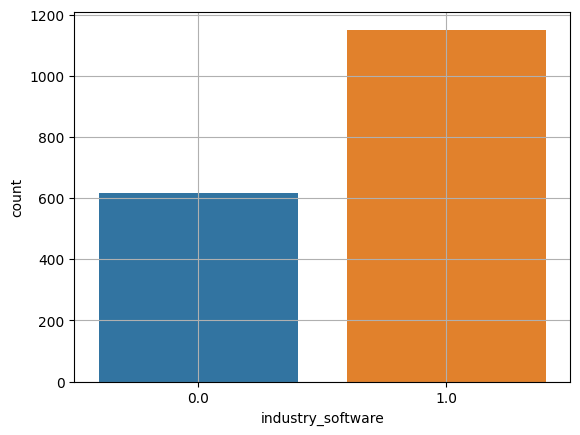

In [ ]:
sns.countplot(x='industry_software',data=users_det)
plt.grid()
#in software industry=1, else 0; 
#industry software~2 times non-industry software

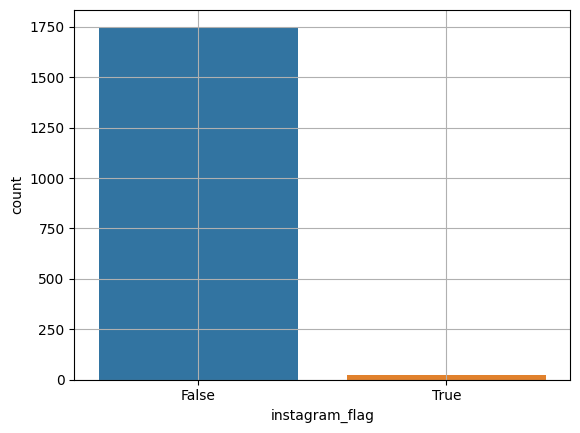

In [ ]:
sns.countplot(x='instagram_flag',data=users_det)
plt.grid()
#USers with no instagram link shares are ~70 times the users with instagram links present

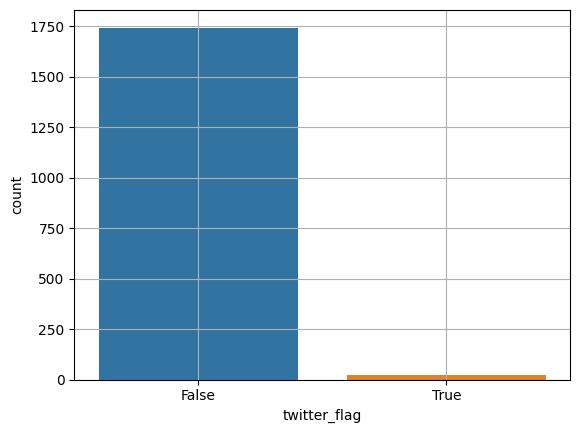

In [ ]:
sns.countplot(x='twitter_flag',data=users_det)
plt.grid()
#Users with no instagram link shares are ~70 times the users with instagram links present

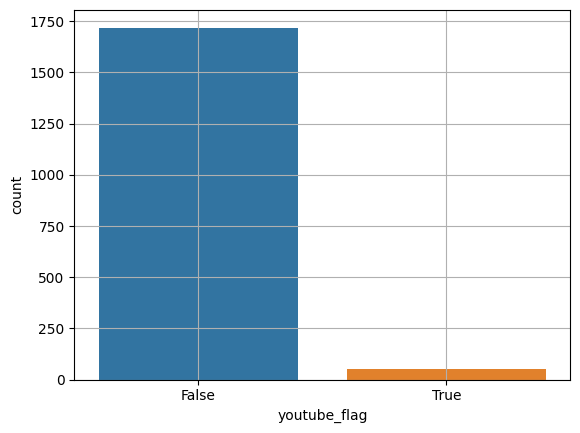

In [ ]:
sns.countplot(x='youtube_flag',data=users_det)
plt.grid()
#Non-youtube flag users are ~16 times the users with youtube flag 

In [ ]:
#Few users save links to external social media profiles on LinkedIn
#Most users tend not to share such details

In [ ]:
users_det['company_tier_numerical'].value_counts()

3    1608
1     551
2     332
Name: company_tier_numerical, dtype: int64

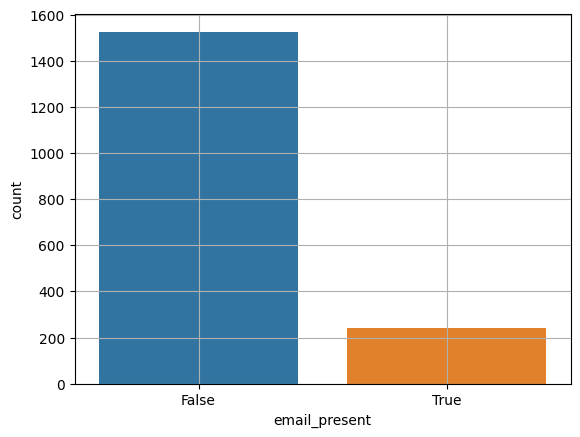

In [ ]:
sns.countplot(x='email_present',data=users_det)
plt.grid()
#Email-Id not present to present ratio is ~7:1 

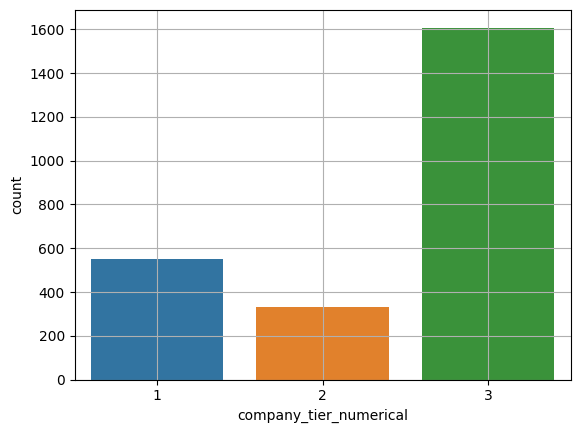

In [ ]:
sns.countplot(x='company_tier_numerical',data=users_det)
plt.grid()
#tier-3/tier-1 ~ 2.8 which may be a result of the number of colleges in tier-3 category, however tier-2 casts a doubt on the outlined idea although Tier-2 as a criteria. The availability of seats may be another cause. 
#tier-3 dominates the overall population. One cause maybe that new colleges may automatically be assigned to the same category.
#tier-1/tier-2 ~ 2
#tier-2 population is the least which maybe because only a few colleges make it to tier-2 or maybe that tier-3 colleges are more recent if it depends on the maturity of college. In the latter case, the higher tier colleges may hold conventional command although it does not guarantee superiority as such.

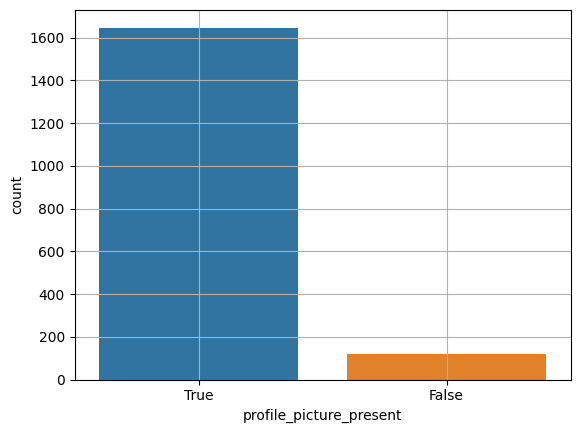

In [ ]:
#Profile picture present for most cases with 16 times more cases of people with profile picture present than with those absent
sns.countplot(x='profile_picture_present',data=users_det)
plt.grid()

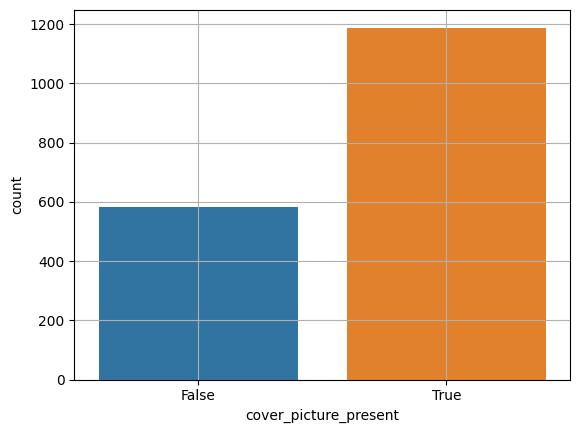

In [ ]:
sns.countplot(x='cover_picture_present',data=users_det)
plt.grid()
#cover picture present/cover picture absent~2

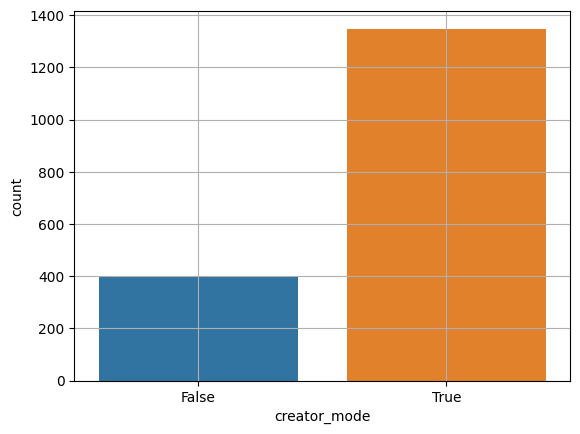

In [ ]:
sns.countplot(x='creator_mode',data=users_det)
plt.grid()

0.0

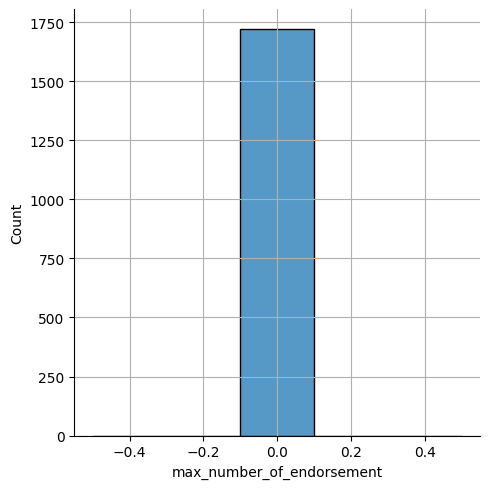

In [ ]:
#Endorsements requires checking
sns.displot(x='max_number_of_endorsement',data=users_det,bins=5)
plt.grid()
users_det['max_number_of_endorsement'].min()
#No sample has received endorsements
#Max number of endorsements=0
#Min number of endorsements=0

In [ ]:
contin = ['years_of_experience','num_of_jobs','jobs_count_by_experience','average_company_tenure','followers','posts_per_week','avg_engagement_per_post_last_30_days','num_post_last_30_days','num_comments_last_30_days','num_reactions_last_30_days','avg_likes_per_post_by_following','avg_comments_per_post_by_following','num_of_documents','num_of_articles','num_of_connections','num_promotional_posts_last_30_day','avg_likes_per_post_last_30_days','avg_comments_per_post_last_30_days','booking_count','gross_earning','core_earning','profile_views','active_days','age_in_days','gross_bookings_count','one_on_one_bookings_count','max_number_of_endorsement','average_endorsement']

count    1769.000000
mean        5.039005
std         3.992237
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
80%         7.000000
90%        10.000000
99%        18.000000
99.9%      32.000000
max        35.000000
Name: years_of_experience, dtype: float64

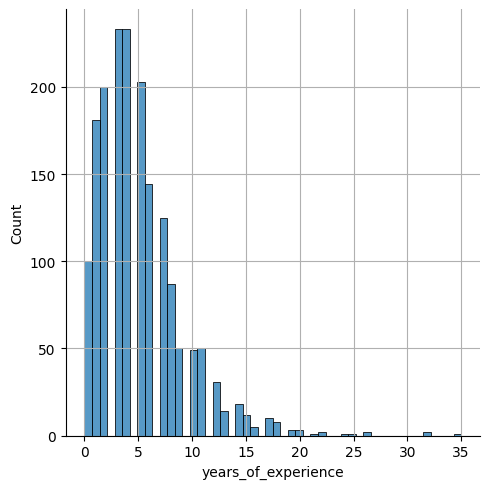

In [ ]:
sns.displot(x='years_of_experience',data=users_det,bins=50)
plt.grid()
users_det['years_of_experience'].describe(percentiles=[0.25,0.75,0.8,0.9,0.99,0.999])
#median~=mode<mean imlying the low experience group~4-5 years dominates the population 
#right-skewed distribution of years of experience implying that the distribution is spread around vast range of experience group
#range lies between 0 to 35 years of experience
#mean years of experience ~5 years

count    1769.000000
mean        4.846806
std         1.763680
min         0.000000
25%         4.000000
50%         5.000000
75%         6.000000
80%         6.000000
90%         7.000000
99%         8.000000
99.9%      10.000000
max        10.000000
Name: num_of_jobs, dtype: float64

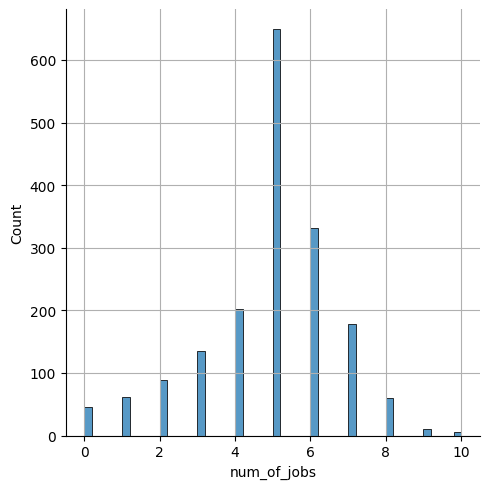

In [ ]:
sns.displot(x='num_of_jobs',data=users_det,bins=50)
plt.grid()
users_det['num_of_jobs'].describe(percentiles=[0.25,0.75,0.8,0.9,0.99,0.999])
#mean=4jobs<median=mode=5jobs-50% samples in the population change around 5 jobs 
#left-skewed data with most populationl lying to the right of median
#range lies between 0 and 10 for number of jobs

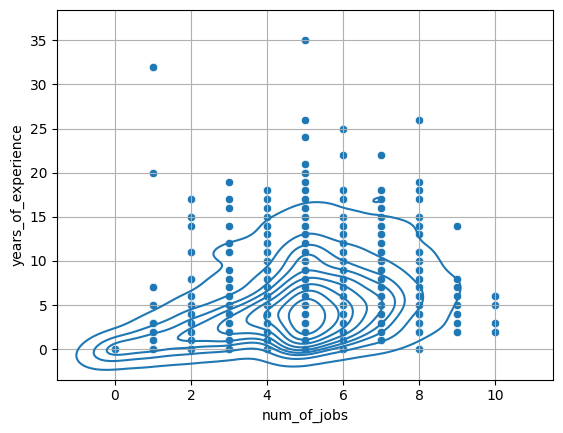

In [ ]:
sns.kdeplot(x='num_of_jobs',y='years_of_experience',data=users_det) 
sns.scatterplot(x='num_of_jobs',y='years_of_experience',data=users_det) 
plt.grid(True)
#Number of jobs changed has a direct correlation with years of experience in general, however it averages around 5 years 
#Most people with 5 years of experience change at least one job 
#Most people with >15 years of experience change at least 4 jobs on average and 7 jobs at max 
#Person with 35 years of experience has changed 5 jobs 

D:\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    1769.000000
mean        1.405259
std         1.259596
min         0.000000
25%         0.666667
50%         1.000000
75%         1.666667
max         7.000000
Name: jobs_count_by_experience, dtype: float64

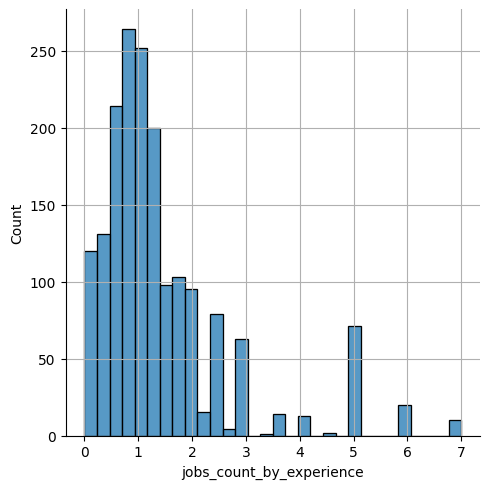

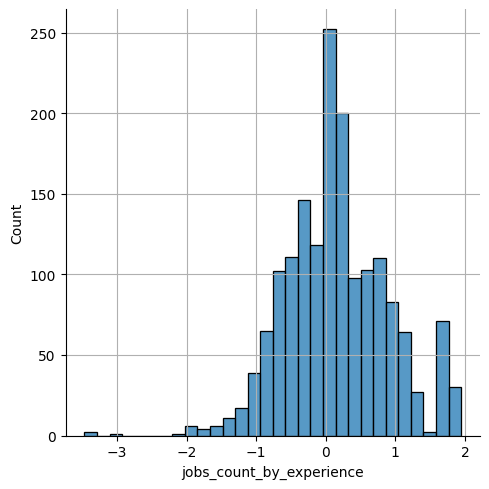

In [ ]:
#relevance of job counts by experience as it covers 10:10 to 3:3-average frequency of job change per year of experiencec
sns.displot(x='jobs_count_by_experience',data=users_det,bins=30)
plt.grid(True)
#log normally distributed data
sns.displot(x='jobs_count_by_experience',data=pd.DataFrame(np.log(users_det['jobs_count_by_experience']),columns=['jobs_count_by_experience']),bins=30)
plt.grid(True)
users_det['jobs_count_by_experience'].describe()
# log normally distributed data
# Most people in the sample of population change job per year of experience implying good correlation with jobs count and experience
# Data is left-skewed log-normally and right-skewed in general 
# Most people change on average more than 1.4 job per year of experience 
# >50% of the sample population change their job more frequently with each corresponding year of experience

0.255937808898231

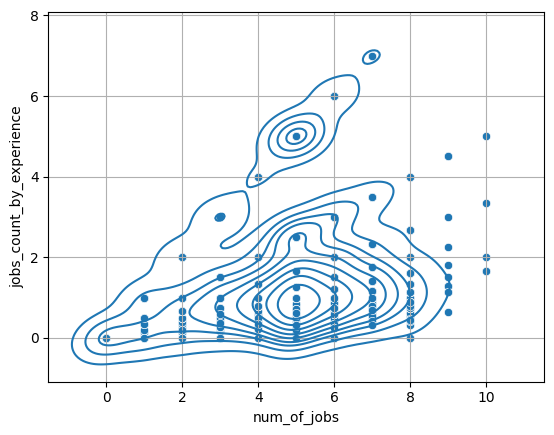

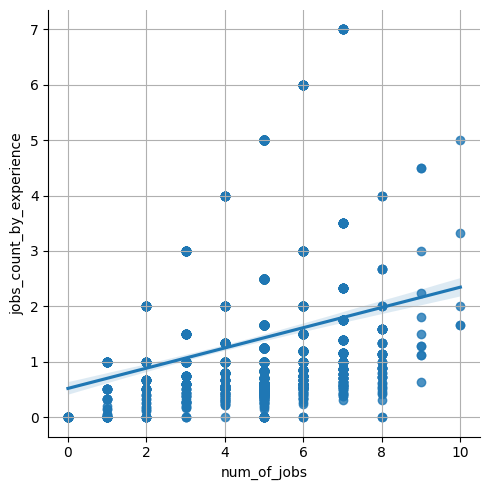

In [ ]:
sns.kdeplot(x='num_of_jobs',y='jobs_count_by_experience',data=users_det) 
sns.scatterplot(x='num_of_jobs',y='jobs_count_by_experience',data=users_det) 
plt.grid(True)
sns.lmplot(x='num_of_jobs',y='jobs_count_by_experience',data=users_det)
plt.grid(True)
users_det['num_of_jobs'].corr(users_det['jobs_count_by_experience'])

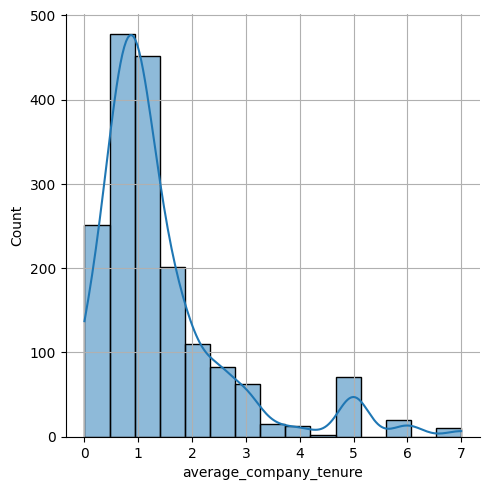

In [ ]:
sns.displot(x='average_company_tenure',data=users_det,kde=True,bins=15)
plt.grid(True)

0.255937808898231

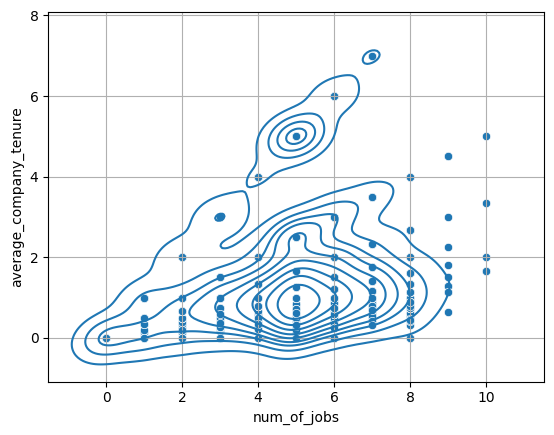

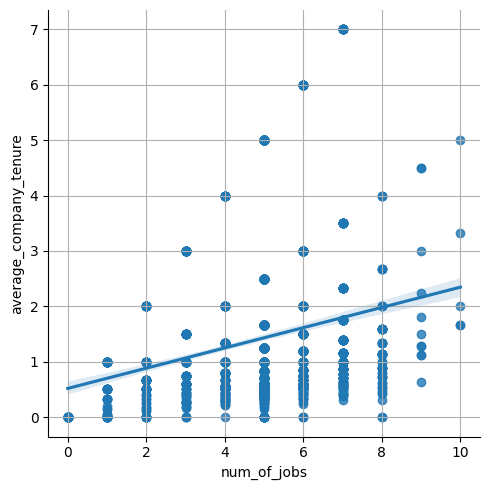

In [ ]:
sns.kdeplot(x='num_of_jobs',y='average_company_tenure',data=users_det) 
sns.scatterplot(x='num_of_jobs',y='average_company_tenure',data=users_det) 
plt.grid(True)
sns.lmplot(x='num_of_jobs',y='average_company_tenure',data=users_det)
plt.grid(True)
users_det['num_of_jobs'].corr(users_det['average_company_tenure'])

0       0.857143
1       1.250000
2       0.625000
3       2.500000
4            NaN
          ...   
2486    2.500000
2487    1.333333
2488    0.318182
2489    1.250000
2490    0.000000
Name: average_company_tenure, Length: 2491, dtype: float64

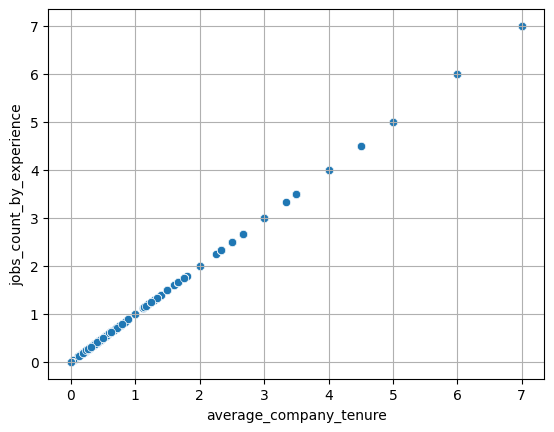

In [ ]:
users_det['average_company_tenure'].corr(users_det['jobs_count_by_experience'])
sns.scatterplot(x='average_company_tenure',y='jobs_count_by_experience',data=users_det)
plt.grid(True)
users_det['average_company_tenure']
#Average company tenure and jobs count by experience are the same

In [ ]:
users_det['average_tenure_by_company']=1/users_det['jobs_count_by_experience']
users_det['average_tenure_by_company']

C:\Users\Admin\AppData\Local\Temp\ipykernel_19216\2456287816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_det['average_tenure_by_company']=1/users_det['jobs_count_by_experience']


0       1.166667
1       0.800000
2       1.600000
3       0.400000
4            NaN
          ...   
2486    0.400000
2487    0.750000
2488    3.142857
2489    0.800000
2490         inf
Name: average_tenure_by_company, Length: 2491, dtype: float64

-0.4624532384142416

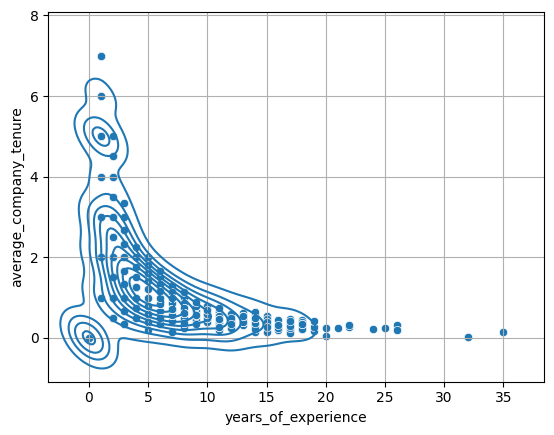

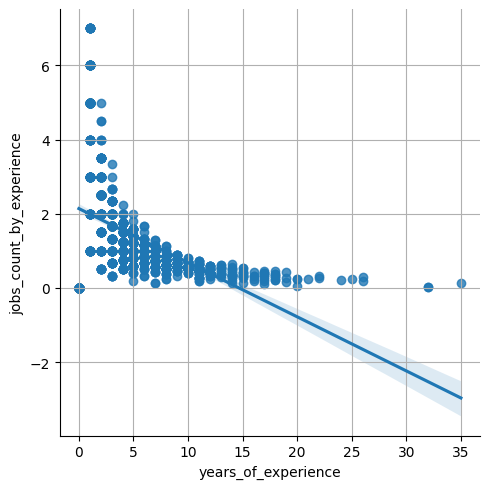

In [ ]:
sns.kdeplot(x='years_of_experience',y='average_company_tenure',data=users_det) 
sns.scatterplot(x='years_of_experience',y='average_company_tenure',data=users_det) 
plt.grid(True)
sns.lmplot(x='years_of_experience',y='jobs_count_by_experience',data=users_det)
plt.grid(True)
users_det['years_of_experience'].corr(users_det['average_company_tenure'])
#Good negative correlation as expected with number of job counts
#hyperbolic relation as expected-1/years_of_experience

D:\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


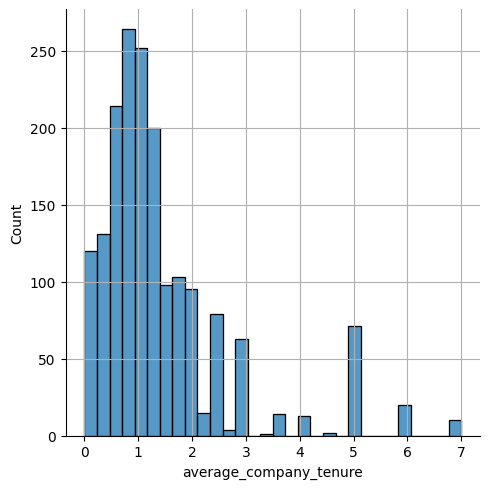

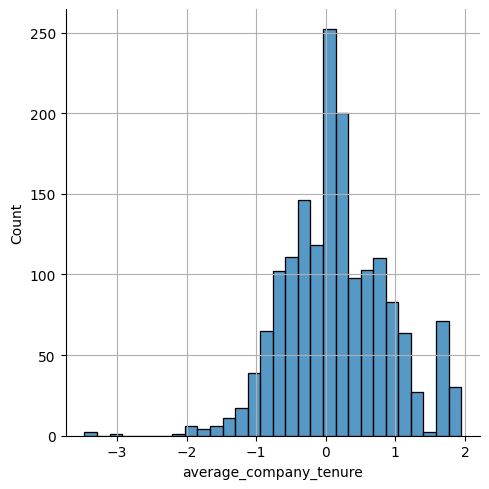

In [ ]:
sns.displot(x='average_company_tenure',data=users_det,bins=30)
plt.grid(True)
sns.displot(x='average_company_tenure',data=pd.DataFrame(np.log(users_det['average_company_tenure']),columns=['average_company_tenure']),bins=30)
plt.grid(True)


D:\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


nan

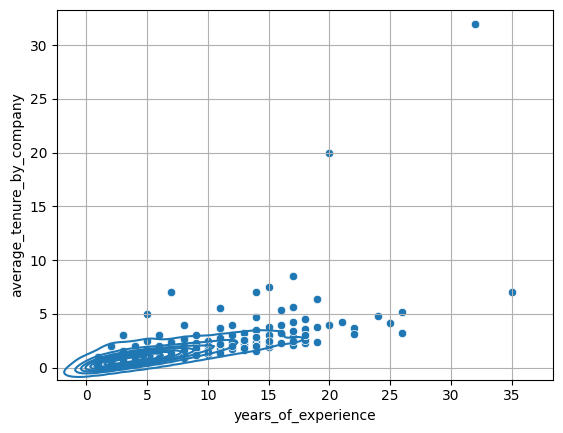

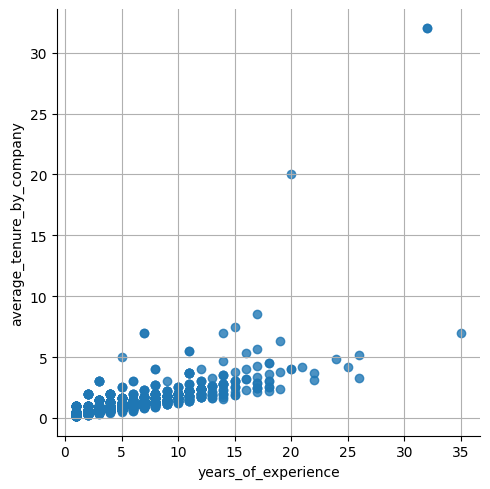

In [ ]:
sns.kdeplot(x='years_of_experience',y='average_tenure_by_company',data=users_det) 
sns.scatterplot(x='years_of_experience',y='average_tenure_by_company',data=users_det) 
plt.grid(True)
sns.lmplot(x='years_of_experience',y='average_tenure_by_company',data=users_det)
plt.grid(True)
users_det['years_of_experience'].corr(users_det['average_tenure_by_company'])
#Good negative correlation as expected with number of job counts
#hyperbolic relation as expected-1/years_of_experience

samples with <20000 followers 1572
samples with 400000<500000 followers 2


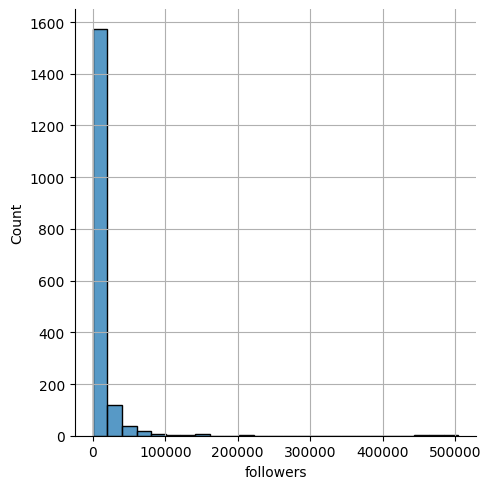

In [ ]:
sns.displot(x='followers',data=users_det,bins=25)
plt.grid(True)
#Most population has <20000 followers
print('samples with <20000 followers',users_det[users_det['followers']<20000]['followers'].count())
print('samples with 400000<500000 followers',users_det[(users_det['followers']>400000)&(users_det['followers']<500000)]['followers'].count())

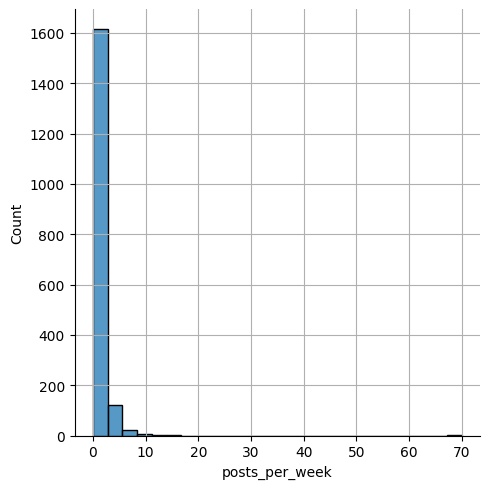

In [ ]:
sns.displot(x='posts_per_week',data=users_det,bins=25)
plt.grid(True)

followers vs posts per week for less than 20000 followers 0.2762892042023261
followers vs posts per week for >60000 followers 0.15481245080190878


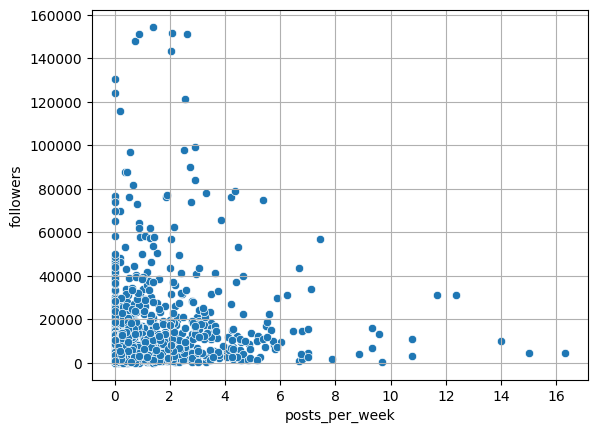

In [ ]:
#sns.kdeplot(x='posts_per_week',y='followers',data=users_det) 
sns.scatterplot(x='posts_per_week',y='followers',data=users_det[users_det['followers']<200000]) 
plt.grid(True)

print('followers vs posts per week for less than 20000 followers',users_det[users_det['followers']<20000]['followers'].corr(users_det[users_det['followers']<20000]['posts_per_week']))
#Number of folllowers and posts per week share a weak positive correlation for followers less than 20000
print('followers vs posts per week for >60000 followers',users_det[users_det['followers']>60000]['followers'].corr(users_det[users_det['followers']>60000]['posts_per_week']))
#Number of followers and posts per week share a weaker positive correlation in general for followers>400000, it seems an inverse relationship
#Overall, in general it shows an inverse relationship between followers and posts per week
#With increase in followers, posts per week decrease which may be a result of quality of post outreach over quantity of posts to retain or increase followers

Users with average engagement per post last 30 days<180= 1597


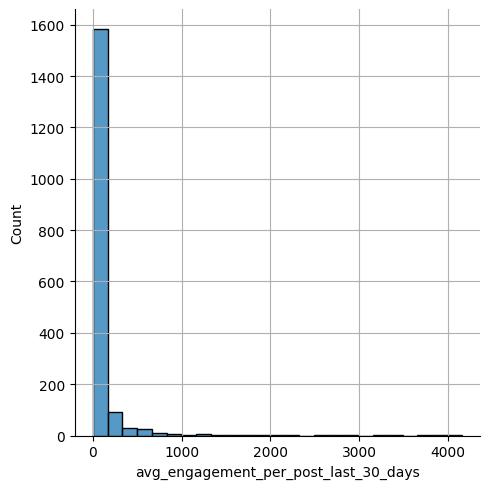

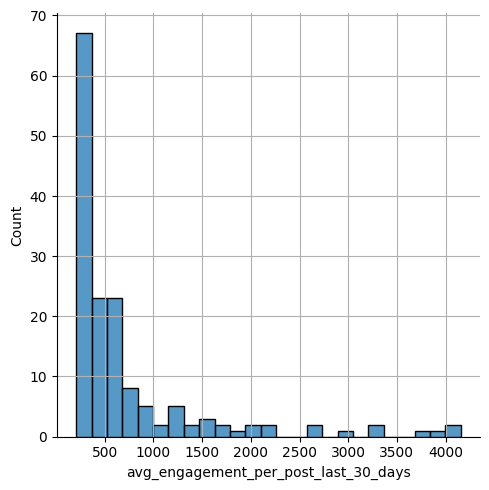

In [ ]:
sns.displot(x='avg_engagement_per_post_last_30_days',data=users_det,bins=25)
plt.grid(True)
print('Users with average engagement per post last 30 days<180=',users_det[users_det['avg_engagement_per_post_last_30_days']<180]['avg_engagement_per_post_last_30_days'].count())
sns.displot(x='avg_engagement_per_post_last_30_days',data=users_det[users_det['avg_engagement_per_post_last_30_days']>200],bins=25)
plt.grid(True)

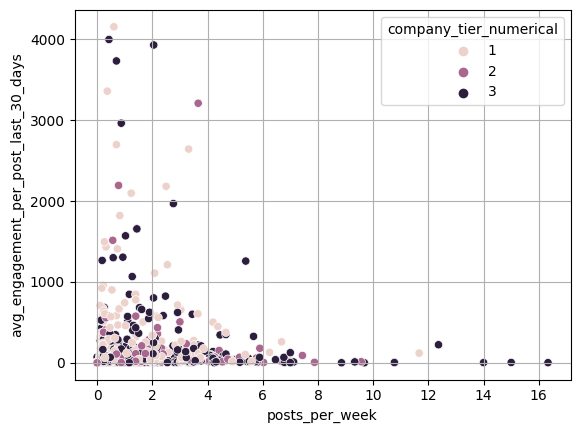

In [ ]:
sns.scatterplot(x='posts_per_week',y='avg_engagement_per_post_last_30_days',data=users_det[users_det['posts_per_week']<20],hue='company_tier_numerical') 
plt.grid(True)
#Is it average posts per week or just posts per week?
#Average engagement per post in last 30 days is higher for lesser posts per week on average
#Tier-1 company have lesser posts per week with higher avg engagement per post last 30 days
#Tier-3 company samples show increasing avg engagement per post last 30 days for less than 6 posts per week
#Tier-3 company samples with higher posts per week >6 have lesser avg engagement per post last 30 days

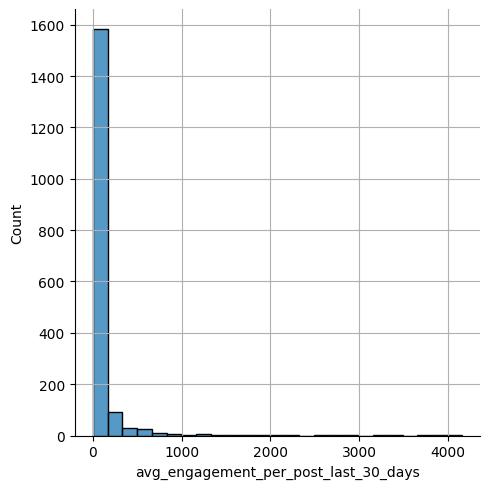

In [ ]:
sns.displot(x='avg_engagement_per_post_last_30_days',data=users_det,bins=25)
plt.grid(True)

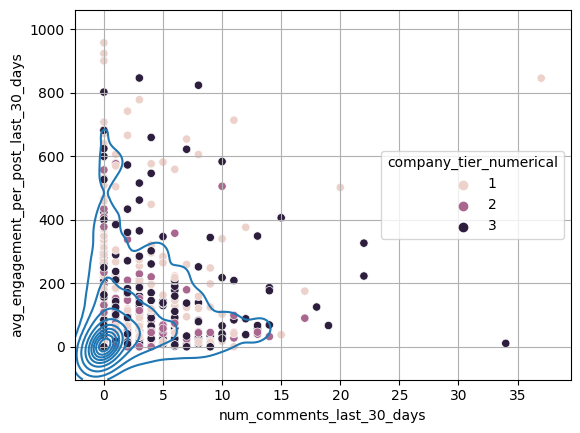

In [ ]:
sns.scatterplot(x='num_comments_last_30_days',y='avg_engagement_per_post_last_30_days',data=users_det[users_det['avg_engagement_per_post_last_30_days']<1000],hue='company_tier_numerical') 
plt.grid(True)
#lesser number of comments last 30 days fetch higher average engagement per post last 30 days
#0 comments in last 30 days fetch maximum engagement 
users_det[users_det['avg_engagement_per_post_last_30_days']<1000]['avg_engagement_per_post_last_30_days'].corr(users_det[users_det['avg_engagement_per_post_last_30_days']<1000]['num_comments_last_30_days'])
#over all poor correlation of number of comments in last 30 days with average engagement per post in last 30 days-~19%
#correlation is better for ['avg_engagement_per_post_last_30_days']<1000~30.96%
sns.kdeplot(x='num_comments_last_30_days',y='avg_engagement_per_post_last_30_days',data=users_det[users_det['avg_engagement_per_post_last_30_days']<1000])#,hue='company_tier_numerical') 
plt.grid(True)

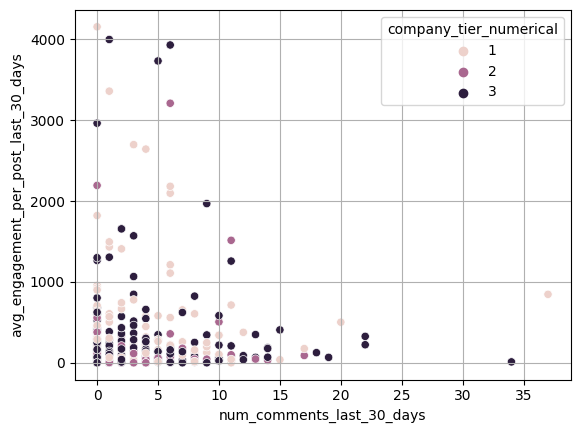

In [ ]:
sns.scatterplot(x='num_comments_last_30_days',y='avg_engagement_per_post_last_30_days',data=users_det,hue='company_tier_numerical') 
plt.grid(True)



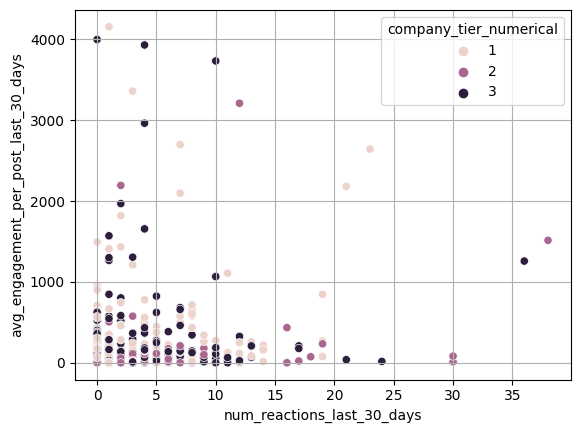

In [ ]:
sns.scatterplot(x='num_reactions_last_30_days',y='avg_engagement_per_post_last_30_days',data=users_det,hue='company_tier_numerical') 
plt.grid(True)
#Anomalous that average engagement per post last 30 days is high for 0 to fewer reactions on the post
#Anomalous that avg engagement per post last 30 days is o to poor(<1000) for higher number of reactions last 30 days

In [ ]:
users_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2491 entries, 0 to 2490
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender_score                          0 non-null      float64
 1   company_tier_numerical                2491 non-null   int64  
 2   years_of_experience                   1769 non-null   float64
 3   designation                           1724 non-null   object 
 4   highest_degree_of_education           1692 non-null   object 
 5   industry_software                     1769 non-null   float64
 6   industry_data                         1769 non-null   object 
 7   industry_marketing                    1769 non-null   object 
 8   industry_hr                           1769 non-null   object 
 9   industry_design                       1769 non-null   object 
 10  industry_finance                      1769 non-null   object 
 11  industry_product 

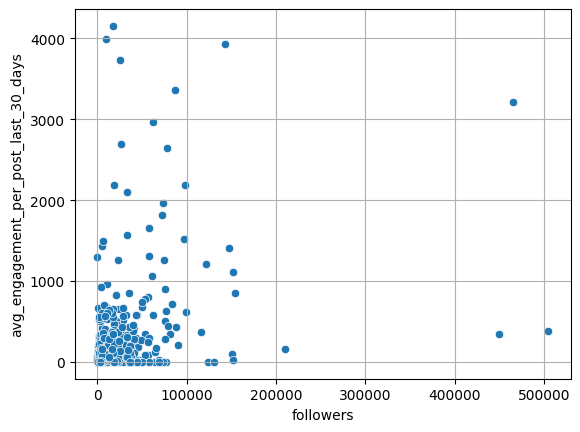

In [ ]:
sns.scatterplot(x='followers',y='avg_engagement_per_post_last_30_days',data=users_det) 
plt.grid(True)
#Average engagement per post last 30 days increases with increase in followers especially for followers less than 100000

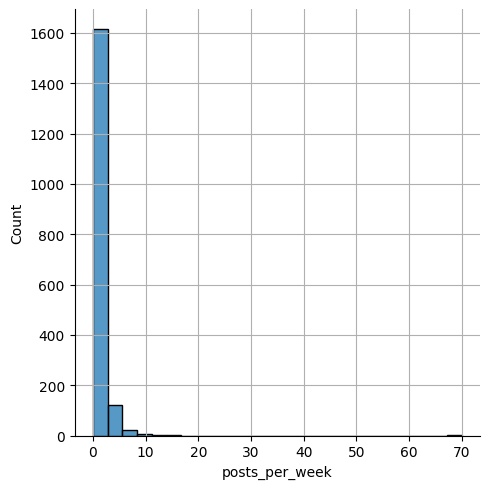

In [ ]:
sns.displot(x='posts_per_week',data=users_det,bins=25)
plt.grid(True)

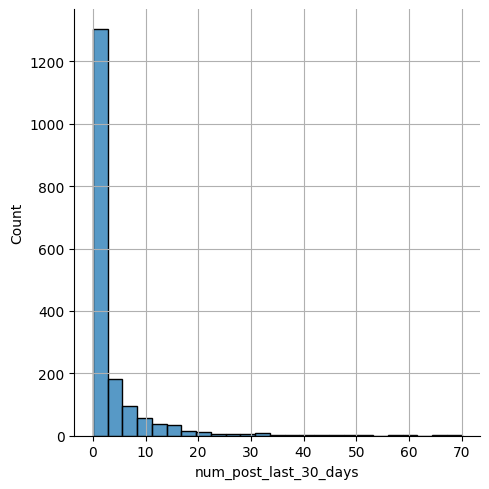

In [ ]:
sns.displot(x='num_post_last_30_days',data=users_det,bins=25)
plt.grid(True)

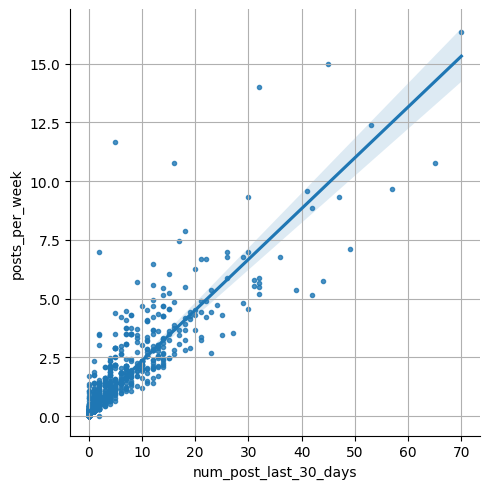

In [ ]:
#sns.scatterplot(x='num_post_last_30_days',y='posts_per_week',data=users_det[users_det['posts_per_week']<20])
#plt.grid(True)
sns.lmplot(x='num_post_last_30_days',y='posts_per_week',data=users_det[users_det['posts_per_week']<20],markers='.')
plt.grid(True)

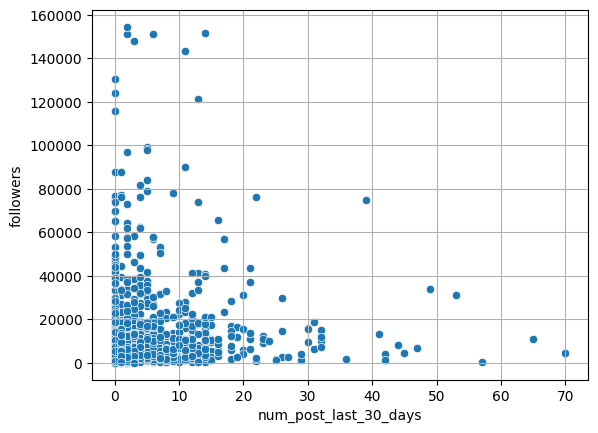

In [ ]:
sns.scatterplot(y='followers',x='num_post_last_30_days',data=users_det[users_det['followers']<200000])
plt.grid(True)
#

In [ ]:
'avg_likes_per_post_by_following'

'avg_likes_per_post_by_following'

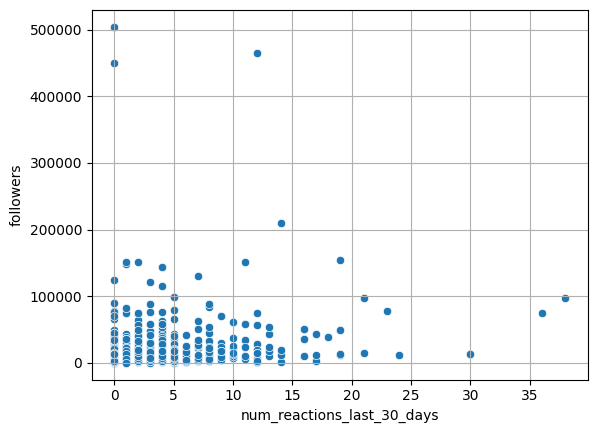

In [ ]:
sns.scatterplot(y='followers',x='num_reactions_last_30_days',data=users_det)
plt.grid(True)
#'num_reactions_last_30_days'
#anomalous that number of reactions 
#num of reactions in last 30 days increases with number of followers
#num of 

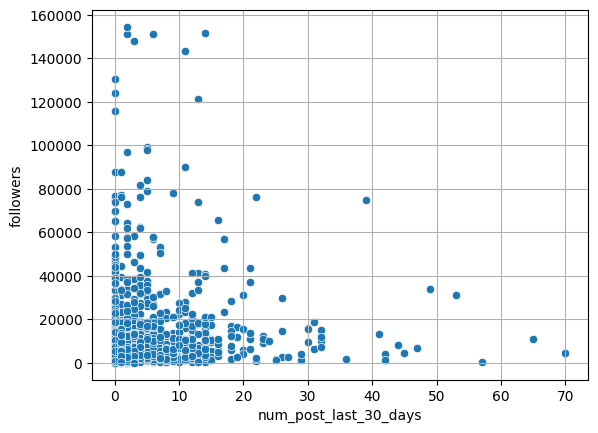

In [ ]:
sns.scatterplot(y='followers',x='num_post_last_30_days',data=users_det[users_det['followers']<200000])
plt.grid(True)

ug = ['Bachelor', 'Bachelor of Technology', 'BTech', 'B. Tech'];
pg = ['MBA', 'Master of Business Administration', 'Master']
adv = ['PhD','dr','Dr.','Doctor']
for x in users_det['highest_degree_of_education']:
    for s in x.split()):
        for u in ug:
            if(s in u):
                users_det = 0
        for p in pg:
            if(s in p):
                print(1)
        for ad in adv:
           if(s in ad) if()
        print(1)
    else:
        print(0)
['Bachelor', 'Bachelor of Technology', 'BTech', 'B. Tech']
['MBA', 'Master of Business Administration', 'Master']

In [ ]:
users_det['highest_degree_of_education'].nunique()

highest_degree_of_education    1037
highest_degree_of_education    1037
dtype: int64

In [ ]:
users_det['highest_degree_of_education']

,highest_degree_of_education,highest_degree_of_education
0,"Bachelor of Technology (B.Tech.), Computer Sci...","Bachelor of Technology (B.Tech.), Computer Sci..."
1,Master of Business Administration - MBA,Master of Business Administration - MBA
2,Master of Business Administration - MBA,Master of Business Administration - MBA
3,"Master's degree, Business Administration and M...","Master's degree, Business Administration and M..."
4,NaN,NaN
...,...,...
2486,"Bachelor of Technology - BTech, Computer Science","Bachelor of Technology - BTech, Computer Science"
2487,NaN,NaN
2488,Advanced Digital Business Program,Advanced Digital Business Program
2489,"Master's, Economics","Master's, Economics"


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2491 entries, 0 to 2490
Data columns (total 78 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   linkedin_url                          1945 non-null   object 
 1   user_id                               2491 non-null   int64  
 2   username                              1769 non-null   object 
 3   booking_count                         1769 non-null   float64
 4   gross_earning                         1769 non-null   float64
 5   core_earning                          1674 non-null   float64
 6   profile_views                         1769 non-null   float64
 7   first_booking                         0 non-null      float64
 8   last_booking                          0 non-null      float64
 9   active_days                           1769 non-null   float64
 10  date_joined                           1769 non-null   object 
 11  age_in_days      

In [ ]:
users_det['gender_score']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2486   NaN
2487   NaN
2488   NaN
2489   NaN
2490   NaN
Name: gender_score, Length: 2491, dtype: float64